In [ ]:
import pandas as pd
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt

In [2]:
class Linear_Regression():

  # initiating the parameters (learning rate & no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y ):
    #Self is always pointing to Current Object.
    #self represents the instance of the class. 
    #By using the “self” keyword we can access the attributes and methods of the class in python. 
    #It binds the attributes with the given arguments.

    # number of training examples & number of features

    self.m, self.n = X.shape  # number of rows & columns

    # initiating the weight and bias 

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent
    
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # upadating the weights
    
    self.w = self.w - self.learning_rate*dw
    self.b = selb.b - self.learning_rate*db
 

  def predict(self, X):

    return X.dot(self.w) + self.b



2.

In [10]:
df = pd.read_csv("dataset.csv")

3.

In [11]:
n = len(df)
n

237

In [12]:
df.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [35]:
X = np.array(df['Head Size(cm^3)']).reshape(-1,1)
Y = np.array(df['Brain Weight(grams)']).reshape(-1,1)

In [36]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(177, 1) (60, 1) (177, 1) (60, 1)


In [93]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train)
print(regr.intercept_,regr.coef_)

[318.65535079] [[0.26519575]]


In [94]:
print(regr.score(X_test, Y_test))

0.6736304836907547


In [95]:
n = len(X)
num = 0
deno = 0
for i in range (n):
  num += (X[i] - X_mean)*(Y[i] - Y_mean)
  deno += (X[i] - X_mean) ** 2

B1 = num/deno
B0 = Y_mean - (B1 * X_mean) 

print (B1,B0)

[0.26342934] [325.57342105]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


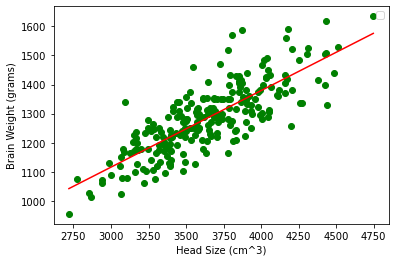

In [96]:
X_max = np.max(X)
X_min = np.min(X)
x = np.linspace(X_min, X_max, 1000)
y = B0 + B1 * x
plt.plot(x, y, color='red')
plt.scatter(X, Y, color='green')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()

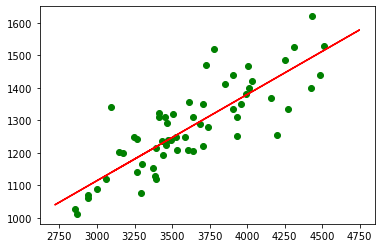

In [97]:
Y_pred = regr.predict(X_train)
plt.scatter(X_test, Y_test, color ='g')
plt.plot(X_train, Y_pred, color ='r')
  
plt.show()

In [98]:
n = len(Y_pred)
num = 0
deno = 0
for i in range (n):
  num += (Y_pred[i] - Y_mean)**2
  deno += (Y[i] - Y_mean) ** 2

R = num/deno
R

array([0.61846789])